# Introduction Python III: portfolio optimisation

In this notebook, we learn some basic optimisation techniques. We illustrate our example with (simple) portfolio optimisation. 

To get the data for the market, we use the import function from `yfinance`.

If you do not have the package `yfinance`, please run in a Terminal (for Mac and Linux users, if you have Windows, open an *Anaconda Prompt* or the command prompt)
`
pip install yfinance
`

You should then quit Jupyter and relaunch everything.


In [11]:
%pylab inline
import pandas as pd
import yfinance as yf

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['source']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## 1/ Load data

We are interested in the following assets: Apple, Microsoft, Nvidia, Activision, Coca Cola.

We load the data from 2021 (the Open Position price for instance). 

(you can try with the data from 2022, but the market was down...).

In [33]:
assets = ['AAPL', 'MSFT', 'NVDA', 'ATVI', 'KO'] 

start_date = '2021-01-01' 
end_date = '2022-01-01' 

df_global = yf.download(assets, start=start_date, end=end_date)['Open']

[*********************100%***********************]  5 of 5 completed


Let us have a look at our Dataframe.

In [34]:
df_global.head(10)

AAPL       ATVI         KO        MSFT        NVDA
Date                                                                
2021-01-04  133.520004  92.699997  54.270000  222.529999  131.042496
2021-01-05  128.889999  90.320000  52.330002  217.259995  130.997498
2021-01-06  127.720001  89.059998  51.970001  212.169998  132.225006
2021-01-07  128.360001  88.860001  50.090000  214.039993  129.675003
2021-01-08  132.429993  90.070000  50.029999  218.679993  133.625000
2021-01-11  129.190002  91.300003  50.619999  218.470001  134.187500
2021-01-12  128.500000  91.000000  50.040001  216.500000  137.524994
2021-01-13  128.759995  89.639999  49.980000  214.020004  134.899994
2021-01-14  130.800003  90.160004  50.160000  215.910004  135.750000
2021-01-15  128.779999  89.989998  49.160000  213.520004  132.279999

**Exercice**: How many days are there in the table? Is it normal?

**Exercice**: Plot the evolution of the market

there are 252 opened days in the market (no market on week-ends)


<AxesSubplot:xlabel='Date'>

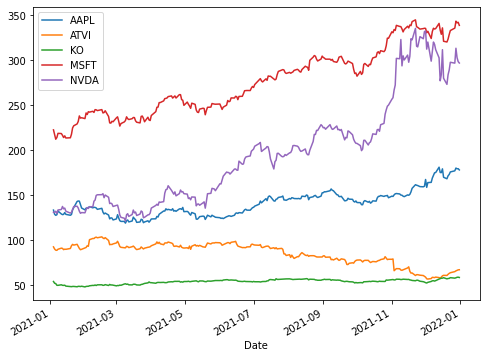

In [35]:
print("there are {} opened days in the market (no market on week-ends)".format(len(df_global)))

figsize(8, 6)
df_global.plot()

## 2. ultra-basic portfolio theory

An asset $i$ can be seen as a random variable $X_i$, corresponding to the *capital gain per day*. We can define
- the average $r_i = \mathbb{E}[X_i]$
- the covariance matrix $C = (c_{ij})$ with $C_{ij} := \mathbb{E}[ (X_i - r_i)(X_j - r_j) ]$

mean = 
AAPL    0.001330
ATVI   -0.001091
KO      0.000329
MSFT    0.002076
NVDA    0.005038
dtype: float64

covariance = 
          AAPL      ATVI        KO      MSFT      NVDA
AAPL  0.000296  0.000074  0.000026  0.000176  0.000424
ATVI  0.000074  0.000332  0.000025  0.000058  0.000099
KO    0.000026  0.000025  0.000089  0.000027 -0.000019
MSFT  0.000176  0.000058  0.000027  0.000235  0.000434
NVDA  0.000424  0.000099 -0.000019  0.000434  0.002589


<AxesSubplot:xlabel='Date'>

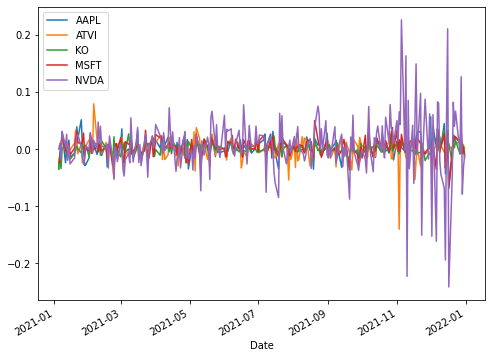

In [36]:
df = df_global.diff()/df_global.iloc[0,:] # daily returns, normalised by the initial price

mean = df.mean() # the mean 
cov = df.cov() # the covariance matrix

print("mean = \n{}".format(mean))
print("\ncovariance = \n{}".format(cov))

df.plot()

Let $N$ be the number of assets. A *strategy* is a vector $w = (w_1, \cdots, w_N)$ with $0 \le w_i \le 1$ and $\sum_i w_i = 1$. The weight $w_i$ corresponds the proportion of asset $i$ in our portfolio.

The goal is to find the best strategy, that is the best vector $W$. There are several criteria for that, that we detail now.

The *gain* of a strategy is $G(W) := \sum_{i=1}^n w_i r_i$.

The *risk* of a strategy is $R(W) := w^T C w$.

In practice, we want the highest gain, with the minimum risk.

**Exercice**: Draw $M = 10000$ strategies at random, and scatter plot the corresponding gains as a function of the risk.

In [37]:
N, M = shape(df)[1], 10000

def gain(w): return dot(mean, w)
def risk(w): return w.T@cov@w

G, R = [], []

W = zeros((N,M)) # to record the values

for m in range(M):
    w = rand(N)
    w /= sum(w) # normalisation
    W[:,m] = w
    G.append( gain(w) )
    R.append( risk(w) )

Text(0, 0.5, 'gain')

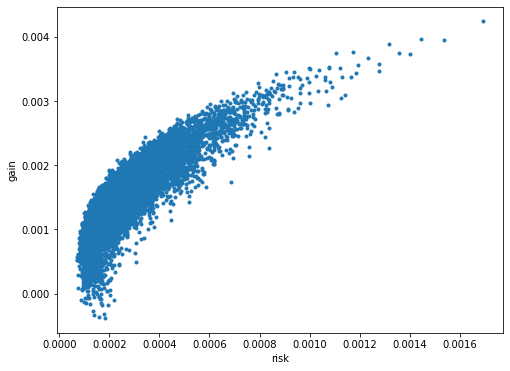

In [38]:
plot(R, G, '.')
xlabel("risk")
ylabel("gain")

**Exercice**: According to your plot, for a risk 0.0005, what is the highest gain one can expect?

**Exercice:** With a daily gain of 0.003%, what is my yearly gain? (Remember that there are only 252 market days per year)

In [39]:
def from_daily_to_yearly (daily_gain):
    return (1 + daily_gain)**252 - 1

daily_gain = 0.003
print("With a daily_gain of {:.2f}%, the yearly gain is {:.2f}%".format(100*0.003, 100*from_daily_to_yearly(0.003)))

With a daily_gain of 0.30%, the yearly gain is 112.73%


## 2. Optimisation of the Sharpe's ratio

In this section, we look for a simple criterion to optimise. We try to optimise the **Sharpe's ratio**

$$ S(W) := \frac{G(W)}{\sqrt{R(W)}}.$$

**Exercice**: On the random portfolios you draw in the last question, which one has the best Sharpe's ratio? What is the corresponding ratio? Place this point in the previous plot.

In [40]:
# Your code here

In [41]:
# Solution
Sharpe = array(G)/sqrt(array(R))
imax = argmax(Sharpe)

Wopt = W[:,imax]

print("The best Sharpe's ratio is S = {}\n\t obtained for the strategy {}.".format(Sharpe[imax], Wopt))
print("The risk is {}, and the gain is {}?".format(R[imax], G[imax]))

The best Sharpe's ratio is S = 0.13714869257136025
	 obtained for the strategy [0.06717631 0.0022177  0.08548841 0.77456523 0.07055236].
The risk is 0.00022974262143319972, and the gain is 0.002078798802424119?


Text(0.5, 1.0, "Best portfolio, with Sharpe's ratio = 0.137149")

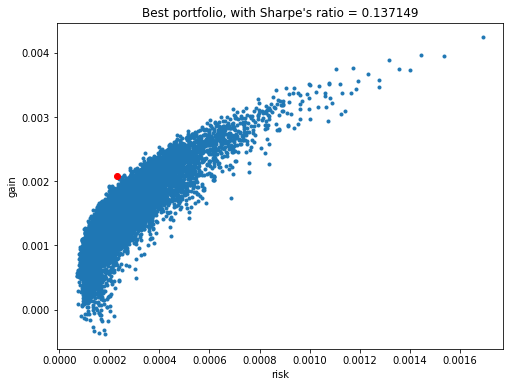

In [42]:
plot(R, G, '.')
xlabel("risk")
ylabel("gain")
plot(R[imax], G[imax], 'or')
title("Best portfolio, with Sharpe's ratio = {:.6f}".format(Sharpe[imax]))

Let us now find the optimum with a concrete algorithm.

**Exercice**: Prove that there is $r \in \mathbb{R}^n$ and $C \in \mathcal{M}(\mathbb{R})$ so that
$$
    S(w) = \dfrac{r^T w}{\sqrt{w^T C w}}, \quad \text{and that} \quad
    \nabla_w S (w) = \dfrac{r}{\sqrt{w^T C w}} - \dfrac{(r^Tw) Cw}{2 (w^T C w)^{3/2}}.
$$
Code these functions as `S` and `dS` respectively.



In [43]:
r = array(mean)
C = array(cov)

def S(w): return dot(r, w)/sqrt(w.T@C@w)

def dS(w): return r/sqrt(w.T@C@w) - dot(r,w)/(w.T@C@w)**(3/2) * C@w

We use a simple gradient ascent to find the optimum. Recall that this sequence is defined by
$$
    w_{n+1} = w_n + \alpha \nabla S (w_n).
$$
**Exercice**: Find the optimal strategy with the gradient descente. Take $\alpha = 0.5$ and $w_0$ at random

**WARNING**: No while loops!

In [44]:
wn = rand(N)
alpha = 0.5

for n in range(100): # 1000 iterations MAX
    dSn = dS(wn)
    if norm(dSn) < 1e-6:
        print("Done")
        break
    wn = wn + alpha*dS(wn)
    
    if n%10 == 0:
        print("Iteration n = {:3}, Sharpe = {:7.4f}, norm gradient = {:f}".format(n, S(wn), norm(dSn)))   
        
wbest = wn

Iteration n =   0, Sharpe =  0.0952, norm gradient = 0.060805
Iteration n =  10, Sharpe =  0.1083, norm gradient = 0.046977
Iteration n =  20, Sharpe =  0.1186, norm gradient = 0.044844
Iteration n =  30, Sharpe =  0.1293, norm gradient = 0.048053
Iteration n =  40, Sharpe =  0.1425, norm gradient = 0.053614
Iteration n =  50, Sharpe =  0.1548, norm gradient = 0.041865
Iteration n =  60, Sharpe =  0.1599, norm gradient = 0.026554
Iteration n =  70, Sharpe =  0.1625, norm gradient = 0.020316
Iteration n =  80, Sharpe =  0.1641, norm gradient = 0.016484
Iteration n =  90, Sharpe =  0.1652, norm gradient = 0.013457


**Exercice** Create a nice Series for the best portfolio you have found, and plot it with bars

Text(0.5, 1.0, "Portfolio with Sharpe's constant = 0.165836")

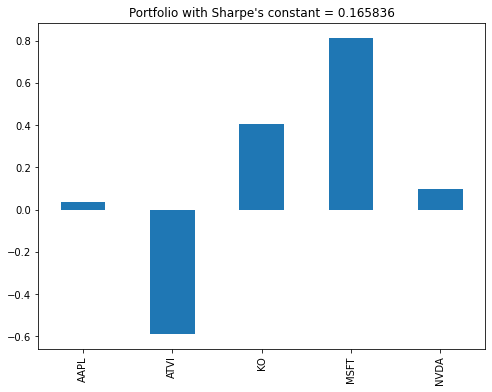

In [45]:
best_portfolio = pd.Series(wbest, index=df.columns)
best_portfolio.plot(kind='bar')

title("Portfolio with Sharpe's constant = {:.6f}".format(S(wbest)))

In practice, one can use an optimisation function from Python. These are given in the scipy package. See the doc [here](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html). 

If you can, always choose the BFGS method.

In [46]:
import scipy.optimize as optimize

best value found = 0.167037


<AxesSubplot:>

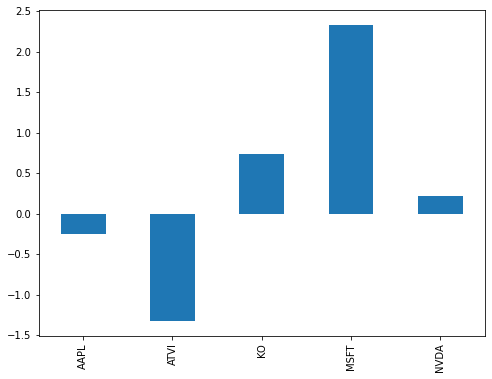

In [47]:
w0 = rand(N)

def mS(w): return -S(w) # to maximize S is to minimize -S

res = optimize.minimize(mS, w0, method="BFGS")
wbest = res.x

print("best value found = {:.6f}".format(-res.fun))
best_portfolio = pd.Series(wbest, index=df.columns)
best_portfolio.plot(kind='bar')

## 3. Optimisation with constraints

Your best portfolio has a problem: it has negative values, it has values bigger than $1$, and the sum is not $1$...

Hopefully, one can tell the minimize function of scipy that we want $w$ to satisfies some bounds and/or constraints.

**Exercice**: find the best portfolio with $w \in [0, 1]^N$ and $\sum w_i = 1$.

*Hint: read the documentation for optimize.minimize*

In [48]:
# your code here

Check constraint. Must be 1: 1.000000
best value found = 0.13912884749972707


<AxesSubplot:>

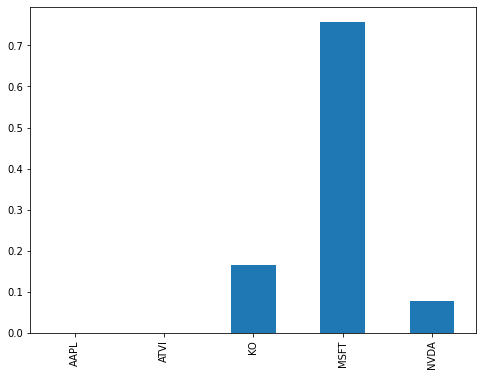

In [49]:
bounds = optimize.Bounds([0]*5, [1]*5) # w is between 0 and 1
constraint = optimize.LinearConstraint(ones(5), 1, 1) # constraint \sum w_i = 1


res = optimize.minimize(mS, w0, bounds=bounds, constraints = constraint)
wbest = res.x

print("Check constraint. Must be 1: {:.6f}".format(sum(wbest)))
print("best value found = {}".format(-res.fun))

best_portfolio = pd.Series(wbest, index=df.columns)
best_portfolio.plot(kind='bar')

**Exercice:** What is the daily gain and the risk of this portfolio?

In [50]:
Sharpe_daily_gain = gain(wbest)
Sharpe_risk = risk(wbest)

print("The best Sharpe gives a daily gain of {:.2f}%, a risk of {:.6f}, and a yearly gain of {:.2f}%".format(100*Sharpe_daily_gain, Sharpe_risk, 100*from_daily_to_yearly(Sharpe_daily_gain)))

The best Sharpe gives a daily gain of 0.20%, a risk of 0.000210, and a yearly gain of 66.07%


## 4. Optimisation of the gain

We now look for a better criterion than Sharpe's ratio. We would like to have the highest possible gain with a maximum risk allowed.


**Exercice** Write a function which returns the best portfolio with maximum risk `maxRsk`. You can use `scipy.optimize`.

In [51]:
# your code here

In [52]:
def mgain(w): return -gain(w) # minus the gain
    
def get_best_portfolio(maxRsk, w0 = rand(5)):
    # returns the best portfolio for a given risk
    bounds = optimize.Bounds([0]*5, [1]*5) # w is between 0 and 1
    
    # We create a tuple of dictionnaries for the constraints
    cons1 = optimize.LinearConstraint(ones(5), 1, 1) # sum(w_i) = 1
    cons2 = optimize.NonlinearConstraint(risk, -np.inf, maxRsk) # risk <= maxRsk
    
    # We maximize Gain, so we minimize -Gain
    res = optimize.minimize(mgain, w0, bounds = bounds, constraints = (cons1, cons2) )
    return pd.Series(res.x, index = assets)

# Check
rsk = 0.0002
wbest2 = get_best_portfolio(rsk)

print("Check constraint. Must be 1: {:.6f}".format(sum(wbest2)))
print("Risk = {:.6f}, Gain = {:.6f}".format(risk(wbest2), gain(wbest2)))


Check constraint. Must be 1: 1.000000
Risk = 0.000427, Gain = 0.001811


**Exercice**: Compute the best portfolios for a range of maxRsk, and display the results nicely.

In [53]:
RR = linspace(1e-6, 0.0015, 100) # Range of risks

list_portfolios = []
list_gains = []

wbest = rand(5) # Initial guess
# Compute everything
for r in RR:
    # For the initial guess of the next computation, we take the best portfolio of the previous.
    wbest = get_best_portfolio(r, w0 = wbest)
    
    list_portfolios.append(wbest)
    list_gains.append( gain(wbest) )

Text(0.5, 0, 'Risk')

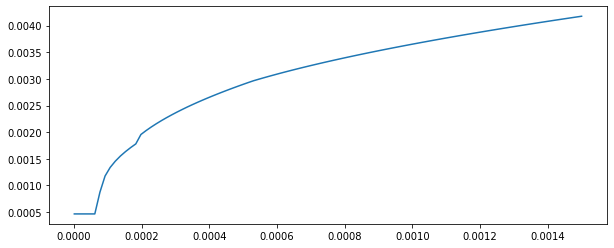

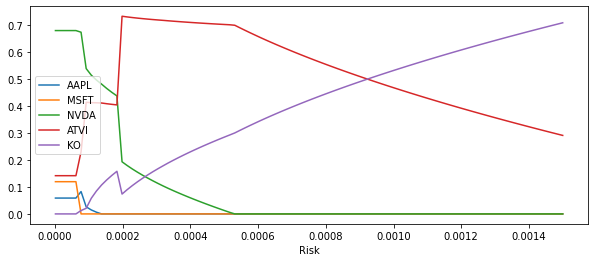

In [54]:
# In another cell (to not repeat the computation), display the result

# record the result in a Dataframe
df_portfolios = pd.DataFrame(list_portfolios, index=RR)

figsize(10, 4)

# plot the gain as a function of risk
plot(RR, list_gains)

# plot the behavior of the portfolios
df_portfolios.plot()
xlabel("Risk")

Text(0, 0.5, 'Gain')

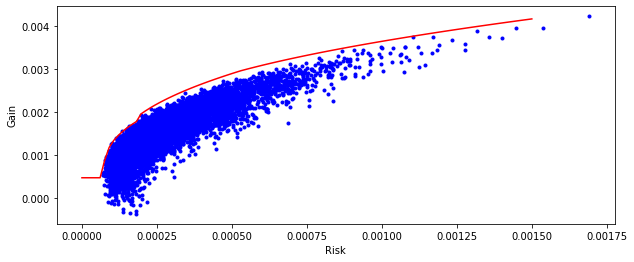

In [55]:
plot(R, G, '.b') # The previous random portfolios
plot(RR, list_gains, 'r') # Our best portfolios
xlabel("Risk")
ylabel("Gain")